**PROYECTO MÓDULO 2**   

Se va a realizar un modelo predictivo de **regresión lineal** para calcular el precio de vivienda en función de diferentes variables a partir del dataset: https://www.kaggle.com/shree1992/housedata 

**Fases del proyecto:**

- Fase 1: Importación del dataset.
- Fase 2: Análisis exploratorio de los datos.
- Fase 3: Fase de entrenamiento.
- Fase 4: Evaluación y análisis de los resultados.

1. IMPORTACIÓN DEL DATASET

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np

In [2]:
# Importación del dataset
df = pd.read_csv('datasets/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


2. ANÁLISIS EXPLORATORIO DE LOS DATOS

In [3]:
# Vemos las dimensiones del dataset y sus columnas
print(df.shape)
print(df.columns)

(4600, 18)
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


Se tienen 4600 datos de viviendas con 18 variables donde una de estas es el precio, que es la variable objetivo

In [4]:
# Vemos si existen valores nulos
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
# Vemos el tipo de variables de las columnas
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

Se tienen 4 variables tipo object y 14 tipo numérico, ya sea float o int. Sin embargo, aunque waterfront sea tipo int, se puede considerar categórico al ser su valor 0 o 1

In [6]:
# Vemos los valores de waterfront
df["waterfront"].value_counts()

waterfront
0    4567
1      33
Name: count, dtype: int64

In [7]:
# Vemos los valores estadísticos más relevantes de las variables numéricas
df.drop('waterfront', axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0
sqft_basement,4600.0,312.081522,464.137228,0.0,0.00,0.000000,610.00,4820.0


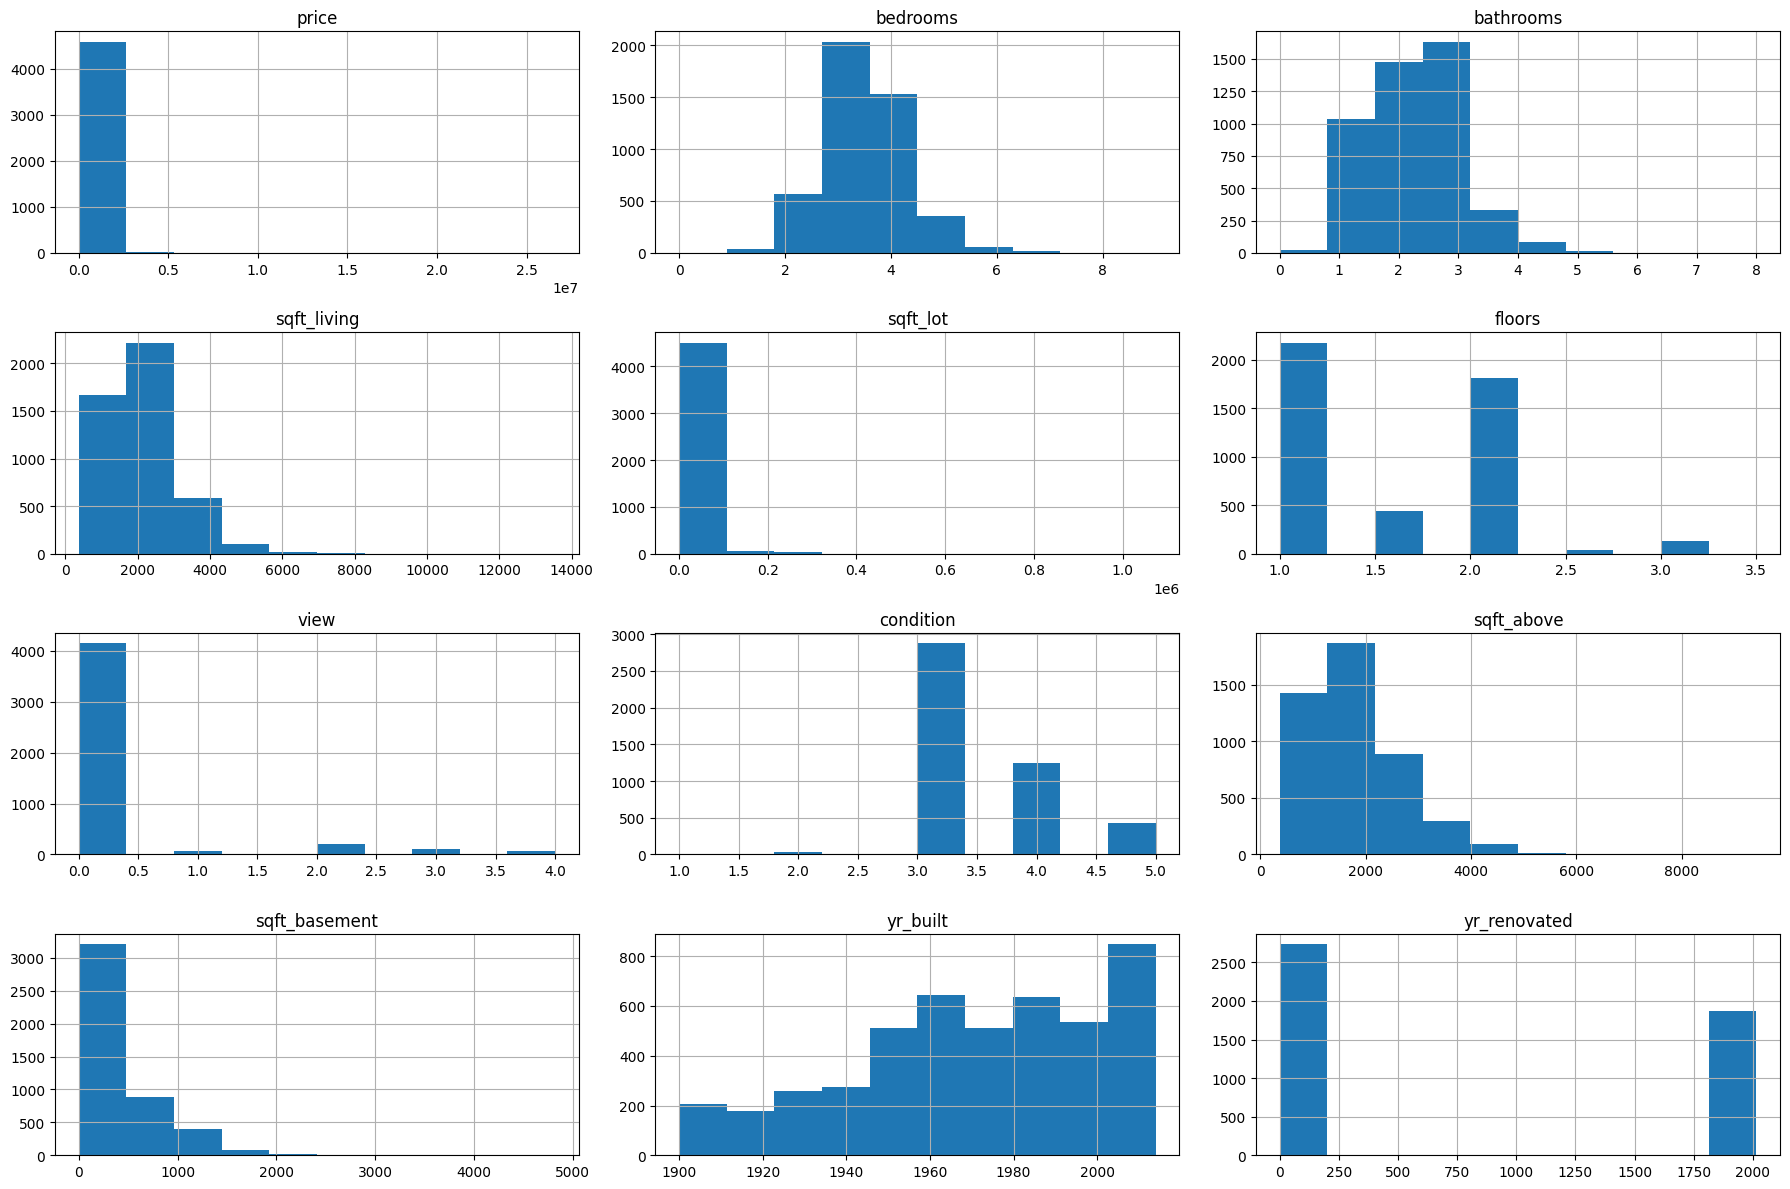

In [8]:
# Vemos los histogramas de las variables numéricas
import matplotlib.pyplot as plt

df.drop('waterfront', axis=1).hist(figsize=(18,12)) 
plt.tight_layout()
plt.show()

Gracias a las estadísticas básicas de las variables y a los histogramas, podemos ver una clara asimetría por la derecha de las variables sqft, precio, view, bathrooms y bedrooms; indicando posibles outliers que pueden ser muy significativos a la hora de entrenar un modelo de regresión lineal que trata de ajustarse a todos los valores de una varible mediante dos coeficientes únicamente.

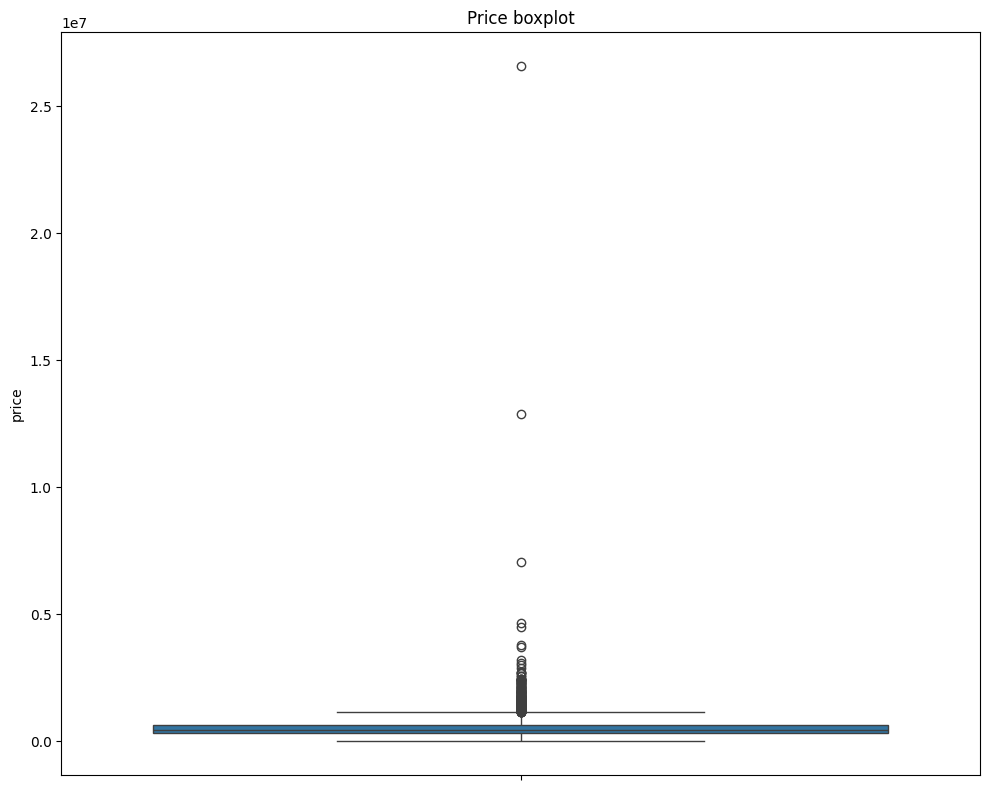


Las viviendas con precios mayores de 5 000 000 son
 2286     7062500.0
4346    12899000.0
4350    26590000.0
Name: price, dtype: float64


In [9]:
# Vamos a analizar en mayor medida la variable price
import seaborn as sns

plt.figure(figsize=(10,8))
sns.boxplot(df['price'])
plt.title('Price boxplot')
plt.tight_layout()
plt.show()

print('\nLas viviendas con precios mayores de 5 000 000 son\n', df[df['price'] >= 5e6]['price'])

Existen únicamente 3 viviendas cuyo precio es mayor de 5 000 000, haciendo que el modelo intente aprender los coeficientes necesarios para poder estimar tanto todas las viviendas por debajo de 5 000 000 como estas tres, reduciendo la precisión en ambos casos. De esta manera se decide eliminar estas 3 viviendas del dataset para mejorar el rendimiento del modelo aunque asumamos que pierda capacidad de predecir precios altos.

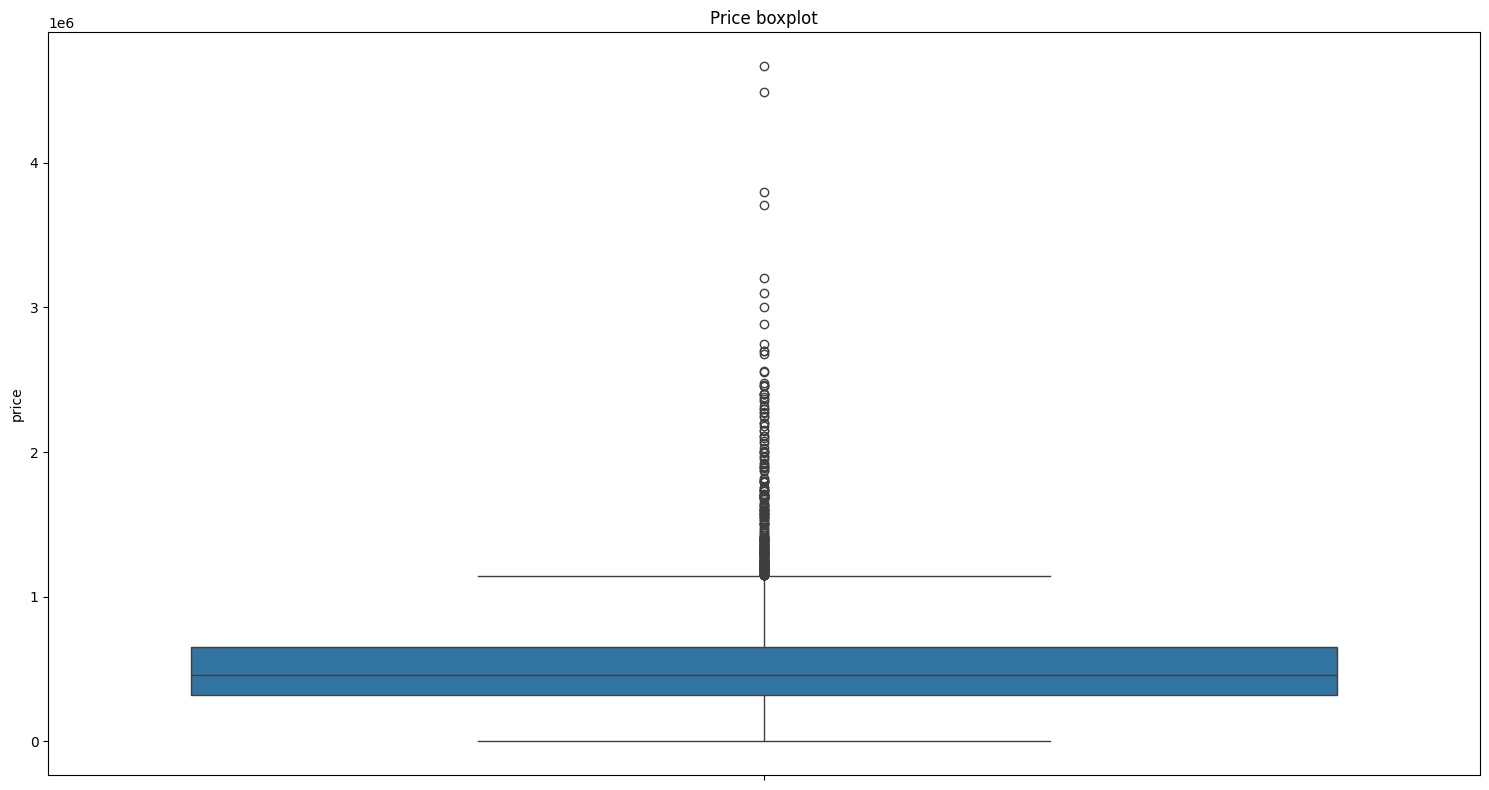

In [10]:
# Eliminamos viviendas con precio mayor de 5 000 000 y vovlvemos a ver los precios en una gráfica tipo box
df_cut = df[df['price'] <= 5e6]

plt.figure(figsize=(15,8))
sns.boxplot(df_cut['price'])
plt.title('Price boxplot')
plt.tight_layout()
plt.show()

In [11]:
# Vemos las viviendas según la canitdad de baños
print(df_cut['bathrooms'].value_counts().sort_index())

bathrooms
0.00       2
0.75      17
1.00     743
1.25       3
1.50     291
1.75     629
2.00     426
2.25     419
2.50    1188
2.75     276
3.00     167
3.25     136
3.50     162
3.75      37
4.00      23
4.25      23
4.50      28
4.75       7
5.00       6
5.25       4
5.50       4
5.75       1
6.25       2
6.50       1
6.75       1
8.00       1
Name: count, dtype: int64


In [12]:
# Vemos las viviendas según la cantidad de dormitorios
print(df_cut['bedrooms'].value_counts().sort_index())

bedrooms
0.0       2
1.0      38
2.0     566
3.0    2030
4.0    1531
5.0     352
6.0      61
7.0      14
8.0       2
9.0       1
Name: count, dtype: int64


Vemos que solo hay 3 viviendas con más de 7 dormitorios y 3 viviendas con 6.5 baños o más. Estos valores provocan lo mismo que las viviendas por encima de 5 000 000 de precio, por lo que se eliminan para ayudar a un modelo de regresión lineal que obtiene un par de coeficientes para cada variable, siendo más susceptible a verse sesgado por outliers.

In [13]:
# Vemos las viviendas según la view
print(df_cut['view'].value_counts().sort_index())

view
0    4138
1      69
2     204
3     116
4      70
Name: count, dtype: int64


In [14]:
# Vemos las viviendas según la condición
print(df_cut['condition'].value_counts().sort_index())

condition
1       6
2      32
3    2873
4    1251
5     435
Name: count, dtype: int64


Para el caso de views, aunque hay uan categoría que sobresale sobre el resto, el resto de categorías están más representadas que en el caso de baños y dormitorios, por lo que no se va a eliminar ninguna categoría.

En cuanto a la condición, existe una categoría infrarrepresentada, la condición 1. Esto hace que sea muy difícil estimar esta categoría y en el intento de estimarla, perjudique la estimación de las anteriores. De esta manera se decide eliminar las viviendas con esta categoría, asumiendo que el modelo no será capaz de estimar viviendas con esta condición correctamente.

In [15]:
# Eliminamos viviendas con + de 7 dormitorios, 6.5 baños o más y con condición 1
df_cut2 = df_cut[(df_cut['bathrooms'] < 6.5) & (df_cut['bedrooms'] <= 7) & (df_cut['condition'] > 1)]
df_cut2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4585.0,540576.130856,350544.592092,0.0,322500.00,460000.00,653000.0,4489000.00
bedrooms,4585.0,3.396510,0.898071,0.0,3.00,3.00,4.0,7.00
bathrooms,4585.0,2.157415,0.771888,0.0,1.75,2.25,2.5,6.25
sqft_living,4585.0,2132.633806,931.396999,370.0,1460.00,1980.00,2620.0,8670.00
sqft_lot,4585.0,14760.251690,35636.131477,638.0,5000.00,7680.00,11000.0,1074218.00
floors,4585.0,1.512214,0.537900,1.0,1.00,1.50,2.0,3.50
waterfront,4585.0,0.006761,0.081957,0.0,0.00,0.00,0.0,1.00
view,4585.0,0.238604,0.774113,0.0,0.00,0.00,0.0,4.00
condition,4585.0,3.455180,0.671834,2.0,3.00,3.00,4.0,5.00
sqft_above,4585.0,1823.354635,847.203370,370.0,1190.00,1590.00,2300.0,8020.00


In [16]:
# Vemos las viviendas restantes en el dataset, habiendo partido de 4600
df_cut2.shape

(4585, 18)

Se han eliminado solo 15 viviendas que ayudarán a mejorar considerablemente la precisión del modelo

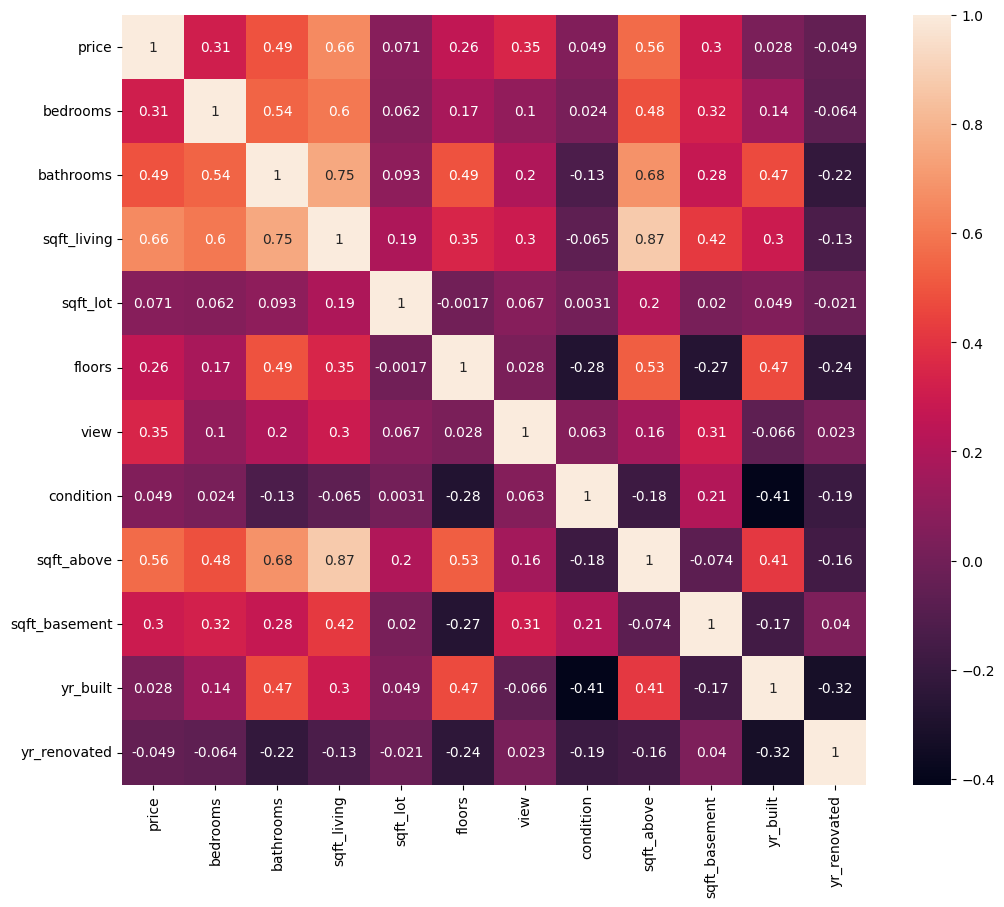

In [17]:
# Vemos el mapa de correlación entre variables
import seaborn as sns

corr = df_cut2.drop('waterfront', axis=1).corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show()

Se puede ver que la variable sqft_living tiene alta correlación con sqft_above y bathrooms además de correlación media con otras por lo que es candidata de ser eliminada. Además esta variable parece que es la que mayor correlación tiene con la variable objetivo: el precio. Otra que también tiene alta correlación con el resto es bathrooms aunque no es tanto coo sqft_living.

De igual manera, existen 3 variables que muestran una correlación con price menor de 0.1. Estas variables van a estar sujetas a evaluación para ver si se eliminan o no

Text(0, 0.5, 'price')

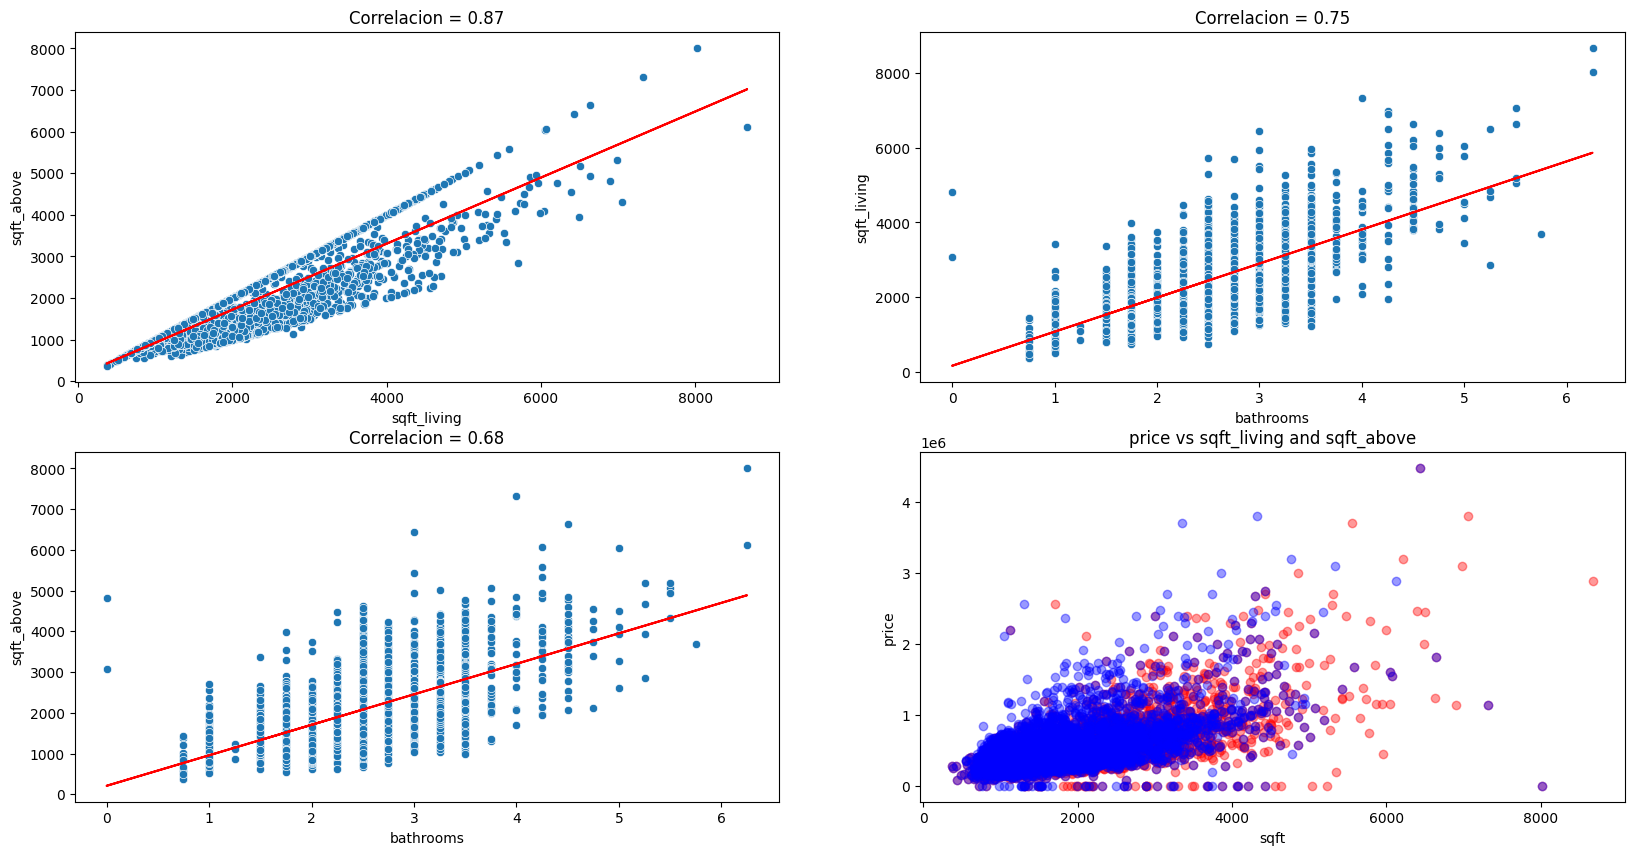

In [18]:
# Vamos a ver la relación entre estas variables

f = plt.figure(figsize=(20,10))

x = df_cut2['sqft_living']
y = df_cut2['sqft_above']
m, b = np.polyfit(x, y, 1)

ax = f.add_subplot(2,2,1)
sns.scatterplot(x= x, y= y, ax=ax)
plt.plot(x, m * x + b, color='r')
ax.set_title('Correlacion = 0.87')
ax.set_xlabel('sqft_living')
ax.set_ylabel('sqft_above')

x = df_cut2['bathrooms']
y = df_cut2['sqft_living']
m, b = np.polyfit(x, y, 1)

ax = f.add_subplot(2,2,2)
sns.scatterplot(x= x, y= y, ax=ax)
plt.plot(x, m * x + b, color='r')
ax.set_title('Correlacion = 0.75')
ax.set_ylabel('sqft_living')
ax.set_xlabel('bathrooms')

x = df_cut2['bathrooms']
y = df_cut2['sqft_above']
m, b = np.polyfit(x, y, 1)

ax = f.add_subplot(2,2,3)
sns.scatterplot(x= x, y= y, ax=ax)
plt.plot(x, m * x + b, color='r')
ax.set_title('Correlacion = 0.68')
ax.set_ylabel('sqft_above')
ax.set_xlabel('bathrooms')

ax = f.add_subplot(2,2,4)
ax.scatter(x='sqft_living', y='price', data=df_cut2, alpha = 0.4, color='red', label='Price vs sqft_living')
ax.scatter(x='sqft_above', y='price', data=df_cut2, alpha = 0.4, color='blue', label='Price vs sqft_above')
ax.set_title('price vs sqft_living and sqft_above')
ax.set_xlabel('sqft')
ax.set_ylabel('price')

Se puede apreciar en las diferentes gráficas que sqft_living y sqft_above aportan prácticamente la misma información y por lo tanto una de las dos se puede eliminar sin perder información para el modelo de predicción.

De esta manera se decide eliminar la variable sqft_above ya que tienes menor correlación con el precio y una gran correlación con sqft_living, siendo esta más completa que la anterior. Sin embargo, se va a probar a entrenar el modelo con y sin la variable bathrooms al verse que existe una correlación lineal alta con sqft_living, viéndose reflejada en el gráfico, pero con una gran dispersión.

Text(0, 0.5, 'price')

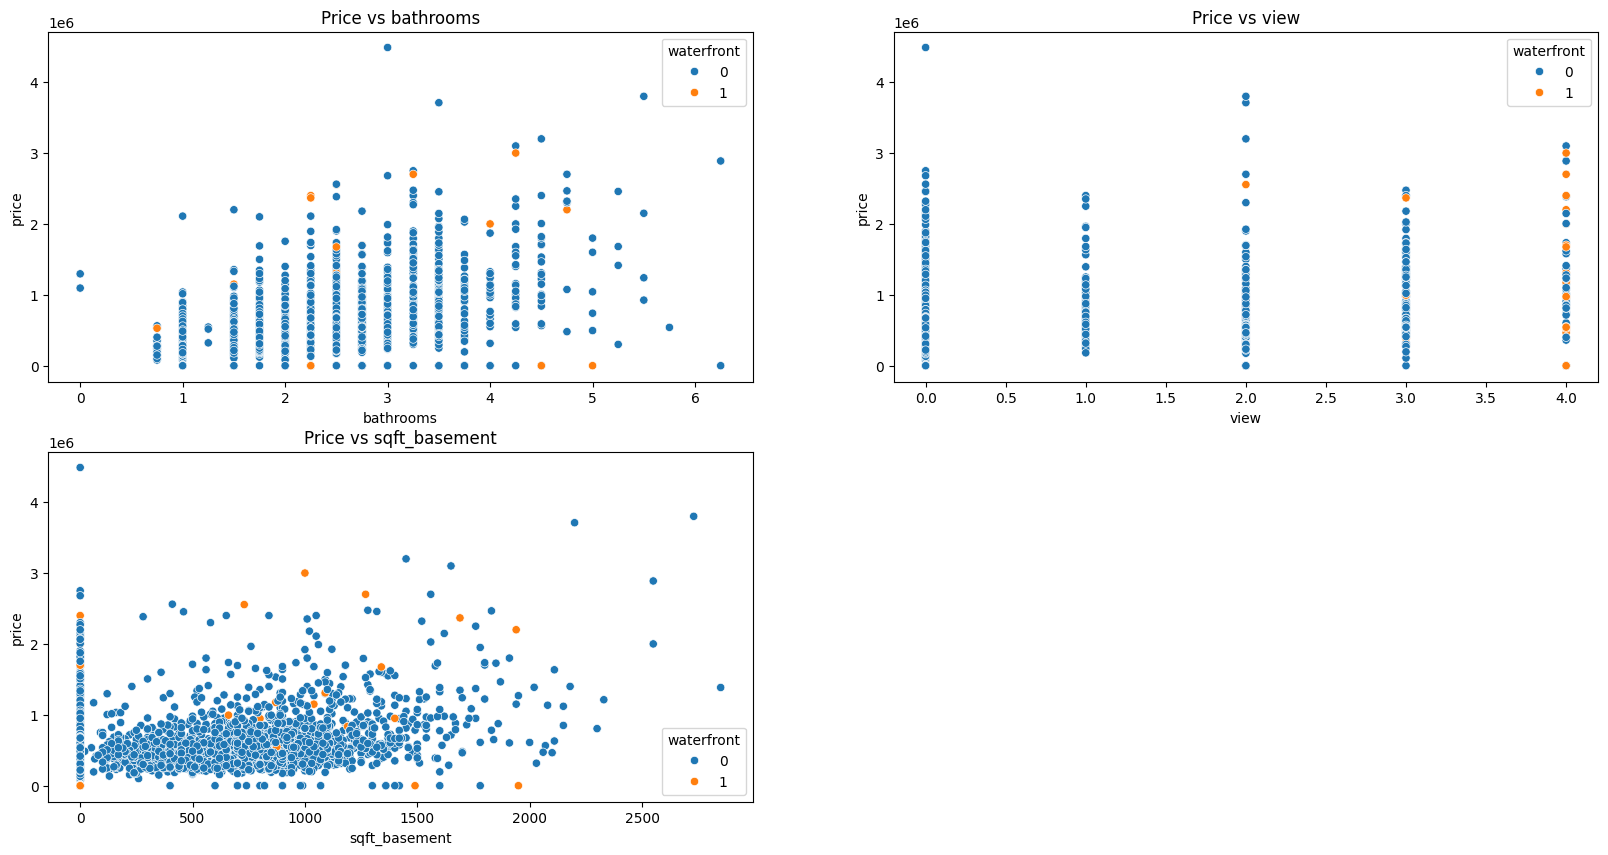

In [19]:
# Vemos gráficas de la variable objetivo con respecto a varibles con correlación media con respecto a ella
f = plt.figure(figsize=(20,10))

ax = f.add_subplot(2,2,1)
sns.scatterplot(x='bathrooms', y='price', data=df_cut2, ax=ax, hue='waterfront')
ax.set_title('Price vs bathrooms')
ax.set_xlabel('bathrooms')
ax.set_ylabel('price')

ax = f.add_subplot(2,2,2)
sns.scatterplot(x='view', y='price', data=df_cut2, ax=ax, hue='waterfront')
ax.set_title('Price vs view')
ax.set_xlabel('view')
ax.set_ylabel('price')

ax = f.add_subplot(2,2,3)
sns.scatterplot(x='sqft_basement', y='price', data=df_cut2, ax=ax, hue='waterfront')
ax.set_title('Price vs sqft_basement')
ax.set_xlabel('sqft_basement')
ax.set_ylabel('price')

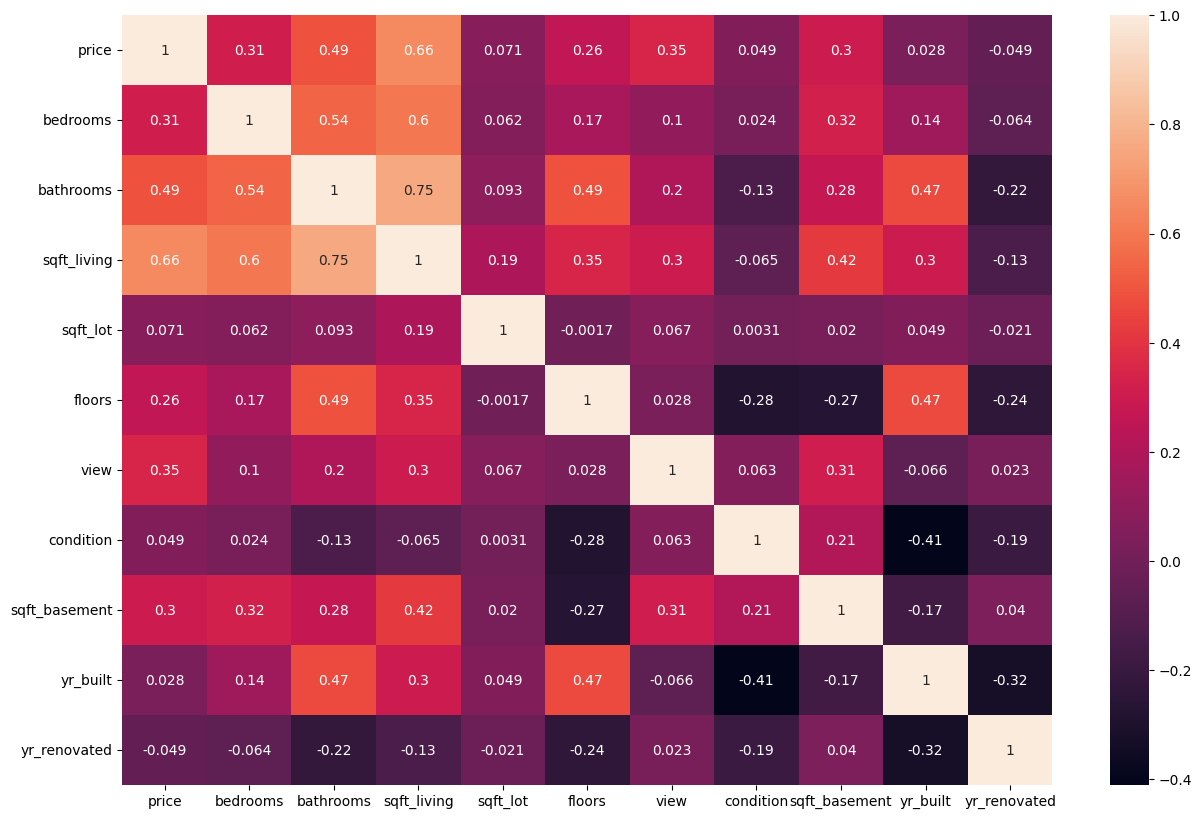

In [20]:
# Vemos la correlación sin sqft_above
# Comentar una vez hecho
df_cut3 = df_cut2.drop('sqft_above', axis=1)

corr = df_cut3.drop('waterfront', axis=1).corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
plt.show()

Vamos a ver cómo son realmente las variables tipo object para ver cómo tratarlas

In [21]:
# Vemos cuantos valores diferentes tiene cada variable
for c in df_cut3.select_dtypes(include='object').columns:
    print(c, df_cut3[c].nunique())

date 70
street 4510
city 44
statezip 77
country 1


Lo primero que se ve es que la variable country solo tiene un valor único por lo que no aporta ningún tipo de información por lo que se puede eliminar sin ningún tipo de información.

En segundo lugar, se aprecia que tenemos la información de la calle, ciudad y código postal de las viviendas y para el caso de las calles tenemos 4510 valores únicos habiendo 4585 viviendas en el dataset, por lo que su agrupación en categorías haría que existieran casi las mismas categorías que viviendas en el dataset. Además, la información de la ciudad y del código postal ya son maneras conocidas de organizar en categorias reales las calles. De esta manera, se va a eliminar la variable street al no aportar más que información de la ubicación exacta de la vivienda y al estar ya dividas en categorias en las variables city y statezip

La variable country no aporta nada al estar todos los datos basados en USA

In [22]:
# Eliminamos la variable country del dataset
# Comentar una vez hecho
df_cut4 = df_cut3.drop(['country', 'street'], axis=1)
df_cut4.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,city,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,2005,Shoreline,WA 98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,280,1921,0,Seattle,WA 98119
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,0,Kent,WA 98042
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,Bellevue,WA 98008
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1992,Redmond,WA 98052


Una vez realizado el análisis exploratorio, se va a proceder a realizar las fases 3 y 4 realizando 3 hipótesis diferentes:
- **Hipótesis 1**: Modelo donde solo se toman las variables numéricas para la predicción del modelo, simplificando de esta manera el modelo al reducir variables y se realiza One Hot Encoding para la variable waterfront.
- **Hipótesis 2**: Modelo que transforma las variables tipo object en valores numéricos mediante el método de Target encoding, transformando estas variables en la media del precio de las filas con mismo valor de la variable en esa columna. Waterfront sigue usando One Hot Encoding.
- **Hipótesis 3**: Modelo donde se eliminan de las variables de la hipótesis 2 las variables con una correlación menor de 0.1 con el precio.

3. FASE ENTRENAMIENTO

In [23]:
# importamos las librerías necesarias para esta fase y la siguiente
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

3.1 Hipótesis 1

In [24]:
# Preparamos el dataset para la hipótesis 1
# Se eliminan las variables tipo objeto
object_columns = df_cut4.select_dtypes(include='object').columns
df_hip1 = df_cut4.drop(object_columns, axis = 1)

# Se realiza el One Hoy Encoding para la columna waterfront
df_hip1 = pd.get_dummies(df_hip1, 'waterfront', drop_first=True, dtype='int8')

df_hip1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1992


In [25]:
# Separamos las variables en entrenamiento y test
X_hip1 = df_hip1.drop('price', axis=1)
y_hip1 = df_hip1['price']

X_train_hip1, X_test_hip1, y_train_hip1, y_test_hip1  = train_test_split(X_hip1, y_hip1, test_size=0.2, random_state=42)

In [26]:
# Entrenamos el modelo
model_hip1 = LinearRegression()
model_hip1.fit(X_train_hip1, y_train_hip1)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


3.2 Hipótesis 2

In [27]:
# Preparamos el dataset para la hipótesis 2
# Se realiza el One Hoy Encoding para la columna waterfront
df_hip2 = pd.get_dummies(df_cut4, columns=['waterfront'], drop_first=True, dtype='int8')
print(df_hip2.shape)

# Separamos las variables en entrenamiento y test
X_hip2 = df_hip2.drop('price', axis=1)
y_hip2 = df_hip2['price']

X_train_hip2, X_test_hip2, y_train_hip2, y_test_hip2  = train_test_split(X_hip2, y_hip2, test_size=0.2, random_state=42)

(4585, 15)


Vamos a realizar el Target Encoding de dos maneras diferentes. La variable date tiene 70 objetos únicos, city 44 y statezip 77. Se va a realizar mediante un econding manual de las variables y mediante la librería category_encoders aplicandou un smoothing bajo para que el valor por categoría esté influenciado, según el número de valores pertenecientes a una categoría, por la media global de la variable objetivo. 

El smoothing puede variar de 1 a 100 siendo el valor más bajo la mayor confianza en la categoría y el valor más alto mayor confianza en la media global. La fórmula es la siguiente: 

\[
TE = \frac{n *μ₍cat₎} + k * μ₍global₎}{n + k}
\]

- **TE**: valor codificado (*target encoding*) de la categoría  
- **n**: número de muestras de esa categoría  
- **μ₍cat₎**: media del target para esa categoría  
- **μ₍global₎**: media global del target (calculada solo con el conjunto de entrenamiento)  
- **k**: parámetro de *smoothing* que controla el equilibrio entre la media de la categoría y la media global


In [28]:
# Primero creamos las columnas con las variables con el encoding manual
global_mean = y_train_hip2.mean() # Solo con entrenamiento para evitar data leakage

# Unificamos el dataset de entrenamiento en una única variable
df_train_hip2 = X_train_hip2.copy()
df_train_hip2['precio'] = y_train_hip2.copy()

# Encoding sin smoothing
enconding_date = df_train_hip2.groupby('date')['precio'].mean()
enconding_city = df_train_hip2.groupby('city')['precio'].mean()
enconding_statezip= df_train_hip2.groupby('statezip')['precio'].mean()

X_train_hip2["date_te"] = X_train_hip2["date"].map(enconding_date)
X_test_hip2["date_te"] = X_test_hip2["date"].map(enconding_date).fillna(global_mean)

X_train_hip2["city_te"] = X_train_hip2["city"].map(enconding_city)
X_test_hip2["city_te"] = X_test_hip2["city"].map(enconding_city).fillna(global_mean)

X_train_hip2["statezip_te"] = X_train_hip2["statezip"].map(enconding_statezip)
X_test_hip2["statezip_te"] = X_test_hip2["statezip"].map(enconding_statezip).fillna(global_mean)

In [29]:
# Creamos las columnas con Target Encoding con smoothing = 10
from category_encoders import TargetEncoder

smooth_encoding = TargetEncoder(cols=['date', 'city', 'statezip'], smoothing=10)
X_train_hip2_smooth = smooth_encoding.fit_transform(X_train_hip2, y_train_hip2)
X_test_hip2_smooth = smooth_encoding.transform(X_test_hip2)

In [30]:
# Quitamos las columnas que no vamos a utilzar en ambos casos
X_train_hip2_te = X_train_hip2.drop(['date', 'city', 'statezip'],  axis = 1)
X_test_hip2_te = X_test_hip2.drop(['date', 'city', 'statezip'],  axis = 1)

X_train_hip2_smooth = X_train_hip2_smooth.drop(['date_te', 'city_te', 'statezip_te'], axis = 1)
X_test_hip2_smooth = X_test_hip2_smooth.drop(['date_te', 'city_te', 'statezip_te'],  axis = 1)

# Entrenamos los modelos
model_hip2_te = LinearRegression()
model_hip2_smooth = LinearRegression()

model_hip2_te.fit(X_train_hip2_te, y_train_hip2)
model_hip2_smooth.fit(X_train_hip2_smooth, y_train_hip2)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


3.3 Hipótesis 3

In [31]:
# Se genera el dataset completo con las variables transformadas según la hipótesis 2 de manera manual
X_conc_hip2 = pd.concat([X_train_hip2_te, X_test_hip2_te]).sort_index()
y_conc_hip2 = pd.concat([y_train_hip2, y_test_hip2]).sort_index()
df_hip3 = pd.concat([X_conc_hip2, y_conc_hip2], axis = 1).sort_index()

# obtenemos las columnas con correlaciones menores de 0.1 con respecto al precio
corr = df_hip3.corr()['price']
low_corr_vars = corr[abs(corr) < 0.1].index.tolist()
low_corr_vars

['sqft_lot', 'condition', 'yr_built', 'yr_renovated']

In [32]:
# Quitamos las variables que tienen correlación menor a 0.1
df_hip3 = df_hip3.drop(low_corr_vars, axis=1)

# Obtenemos las variables independientes y dependientes
X_hip3 = df_hip3.drop('price', axis=1)
y_hip3 = df_hip3['price']

# Separamos las variables en entrenamiento y test
X_train_hip3, X_test_hip3, y_train_hip3, y_test_hip3 = train_test_split(X_hip3, y_hip3, test_size=0.2, random_state=42)

In [33]:
# Entrenamos el modelo
model_hip3 = LinearRegression()
model_hip3.fit(X_train_hip3, y_train_hip3)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


4. FASE DE EVALUACIÓN Y ANÁLISIS DE RESULTADOS

In [34]:
# Realizamos las predicciones de las 3 hipótesis
y_pred_hip1 = model_hip1.predict(X_test_hip1)
y_pred_hip2_te = model_hip2_te.predict(X_test_hip2_te)
y_pred_hip2_smooth = model_hip2_smooth.predict(X_test_hip2_smooth)
y_pred_hip3 = model_hip3.predict(X_test_hip3)

In [35]:
# Obtenemos el MSE y R2 de las 3 hipótesis
mse_hip1 = mean_squared_error(y_test_hip1, y_pred_hip1)
rmse_hip1= np.sqrt(mse_hip1)
r2_hip1 = r2_score(y_test_hip1, y_pred_hip1)

mse_hip2_te = mean_squared_error(y_test_hip2, y_pred_hip2_te)
rmse_hip2_te= np.sqrt(mse_hip2_te)
r2_hip2_te = r2_score(y_test_hip2, y_pred_hip2_te)

mse_hip2_smooth = mean_squared_error(y_test_hip2, y_pred_hip2_smooth)
rmse_hip2_smooth= np.sqrt(mse_hip2_smooth)
r2_hip2_smooth = r2_score(y_test_hip2, y_pred_hip2_smooth)

mse_hip3 = mean_squared_error(y_test_hip3, y_pred_hip3)
rmse_hip3= np.sqrt(mse_hip3)
r2_hip3 = r2_score(y_test_hip3, y_pred_hip3)

print('RMSE_hip1 =', rmse_hip1, ' RMSE_hip2 manual =', rmse_hip2_te, ' RMSE_hip2 con smooth =', rmse_hip2_smooth, ' RMSE_hip3 =', rmse_hip3)
print('R2_hip1 =', r2_hip1, ' R2_hip2 manual =', r2_hip2_te, ' R2_hip2 con smooth =', r2_hip2_smooth, ' R2_hip3 =', r2_hip3)

RMSE_hip1 = 231139.44784000548  RMSE_hip2 manual = 185829.66082141368  RMSE_hip2 con smooth = 191076.24965536653  RMSE_hip3 = 190529.4967458697
R2_hip1 = 0.5540018623505847  R2_hip2 manual = 0.7117196964258635  R2_hip2 con smooth = 0.6952116804370483  R2_hip3 = 0.6969534508577842


Vamos a sacar algunas diferencias entre los resultados de MSE para sacar conclusiones

In [36]:
# Diferencia entre opciones de la hipótesis 2
dif_hip2 = np.abs(rmse_hip2_smooth - rmse_hip2_te)
print('La diferencia entre las dos opciones de la hipótesis 2 es:', dif_hip2, 'donde añadir smooth tiene un error mayor')
print('La diferencia relativa es del:', np.round(dif_hip2 / rmse_hip2_smooth, 3), '%')

La diferencia entre las dos opciones de la hipótesis 2 es: 5246.5888339528465 donde añadir smooth tiene un error mayor
La diferencia relativa es del: 0.027 %


In [37]:
# Diferencia entre hip 1 y 2 
dif_hip12 = np.abs(rmse_hip1 - rmse_hip2_te)
print('La diferencia entre las hipótesis 1 y 2 es:', dif_hip12, 'donde la hipótesis 1 tiene un error mayor')
print('La diferencia relativa es del:', np.round(dif_hip12 / rmse_hip1, 3), '%')

La diferencia entre las hipótesis 1 y 2 es: 45309.7870185918 donde la hipótesis 1 tiene un error mayor
La diferencia relativa es del: 0.196 %


In [38]:
# Diferencia entre hip 2 y 3 tomando la opción manual de la hipótesis al ser la base tomada para la hipótesis 3
dif_hip23 = np.abs(rmse_hip3 - rmse_hip2_te)
print('La diferencia entre las hipótesis 2 y 3 es:', dif_hip23, 'donde la hipótesis 3 tiene un error mayor')
print('La diferencia relativa es del:', np.round(dif_hip23 / rmse_hip3, 3), '%')

La diferencia entre las hipótesis 2 y 3 es: 4699.835924456012 donde la hipótesis 3 tiene un error mayor
La diferencia relativa es del: 0.025 %


La primera conclusión que se puede obtener es que el algoritmo de regresión lineal no parece captar correctamente los patrones necesarios para estimar correctamente el precio de la vivienda, por lo que sería necesario cambiar el tipo de algoritmo para obtener mejores predicciones a partir de los datos que se tienen. 

Una vez comentado esto, la comparación entre las hipótesis se va a realizar a partir de las diferencias relativas debido a los resultados de RMSE tan elevados.
- La hipótesis con error más elevado es la hipótesis 1 debido a la supresión de las variables city y statezip que, cuando se realizó el mapa de correlación en la hipótesis 2, se pudo ver que son 2 variables que tienen correlación significativa con el precio, por lo que no es conveniente eliminarlas. Sin embargo, esta hipótesis ha tenido una diferencia de 0.2 % con respecto a la mejor hipótesis, la 2 con un Target Encoding manual, por lo que no supone una mejora significativa.
- La hipótesis 2 manual ha sido la que mejores resultados ha obtenido por encima de la misma hipótesis aplicando smooth y la hipóteis 3. Sin embargo, en ambos casos, la diferencia es menor al 0.03 %, por lo que son diferencias aún menores y no parece que haya una diferencia real que haga tomar una decisión categórica. 
- La diferencia entre las dos variantes de la hipótesis 2 se debe a que, al ser city y statezip dos variables cuyas opciones únicas están bien representadas en todo el dataset, no es necesario realizar un smooth para salvaguardar que las opciones únicas poco representadas tengan un valor coherente al acercarlo a la media global.
- En cuanto a la hipótesis 3, cuando se eliminan variables siempre se incurre en pérdida de información que provoca una pérdida de precisión pero en este caso se ha reducido el peso del dataframe y por lo tanto el coste computacional que puede ser relevante para un futuro escalado incurriendo en un error menor al 0.01 % y por lo tanto se considera una decisión acertada.

De esta manera se concluye que la mejor hipótesis es la número 2 manual al obtener el mejor resultado de la hipótesis planteadas y siendo significativas las diferencias absolutas entre modelos debido a que el tipo de algoritmo no parece ser el más correcto para este problema. si las diferencias absolutas fueran menores, se eligiría la hipótesis 3 ya que la diferencia relativa es despreciable y el peso del dataset para entrenar el modelo es menor al eliminar varias columnas

Vamos ahora a realizar una comparación gráfica de los resultados obtenidos

In [39]:
# Importamos librerías
import matplotlib.pyplot as plt

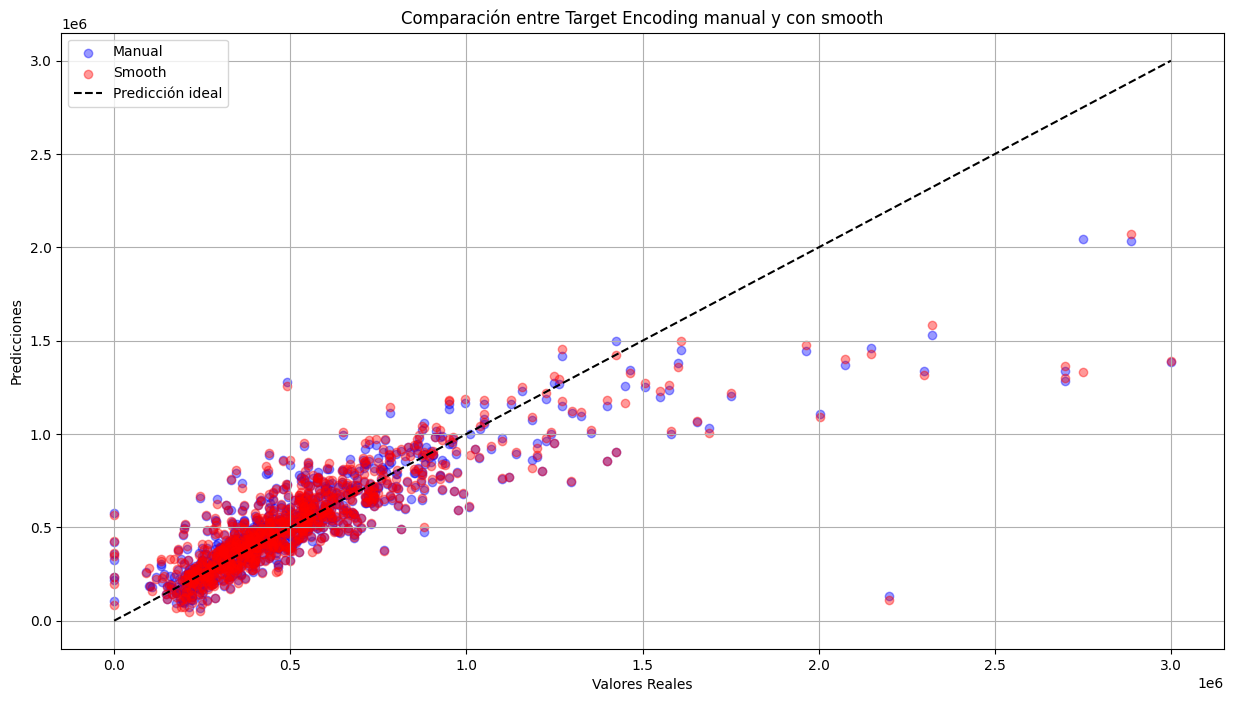

In [40]:
# Comparamos gráficamente las predicciones de las dos variantes de la hipótesis 2
x = np.linspace(np.min(y_test_hip2), np.max(y_test_hip2), 100)

plt.figure(figsize=(15,8))
plt.scatter(y_test_hip2, y_pred_hip2_te, label='Manual', alpha=0.4, color='b')
plt.scatter(y_test_hip2, y_pred_hip2_smooth, label='Smooth', alpha=0.4, color='r')
plt.plot(x, x, linestyle='--', color='black', label='Predicción ideal')
plt.title('Comparación entre Target Encoding manual y con smooth')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid()
plt.legend()
plt.show()

Se aprecia como las predicciones son prácticamente las mismas para todos los casos, debido a la poca diferencia relativa que existe entre ambas opciones. Además, se comprueba que el modelo no ha sido capaz de predecir correctamente, con errores grandes, las casas con precio 0 y el error se va haciendo más grande a medida que los precios superan los 1.5 millones de precio

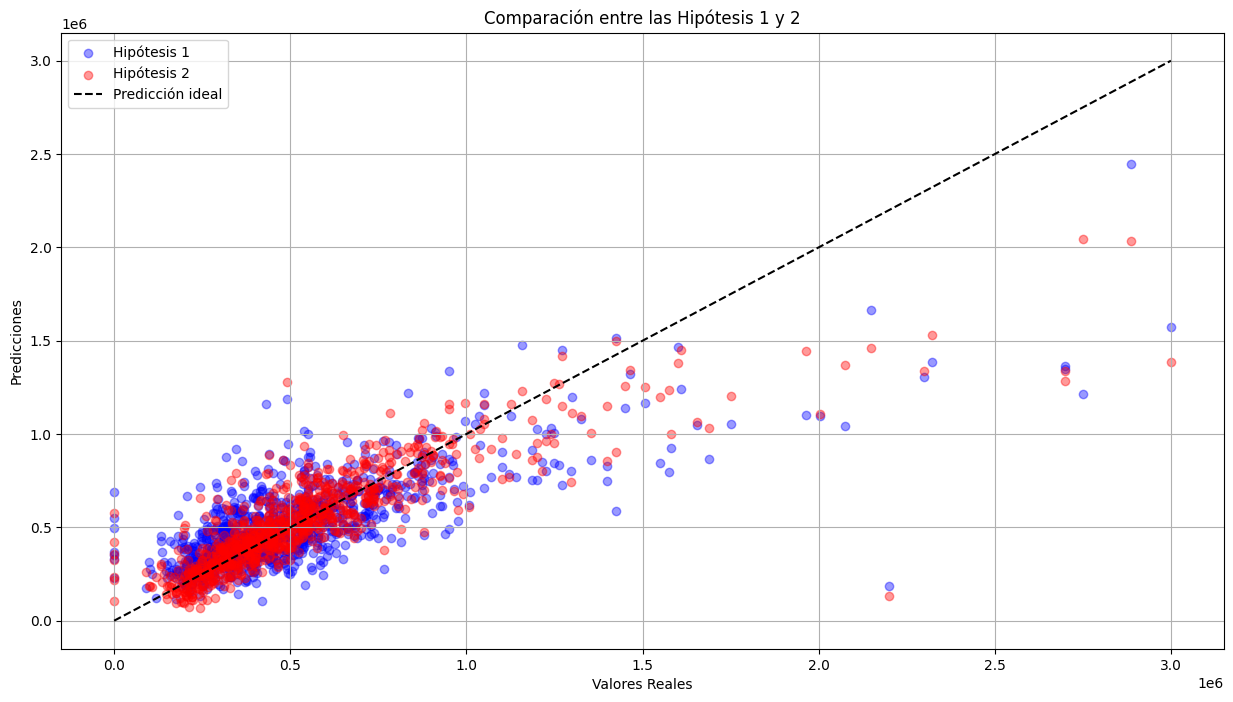

In [41]:
# Comparamos gráficamente las predicciones de las hipótesis 1 y 2
x = np.linspace(np.min(y_test_hip2), np.max(y_test_hip2), 100)

plt.figure(figsize=(15,8))
plt.scatter(y_test_hip1, y_pred_hip1, label='Hipótesis 1', alpha=0.4, color='b')
plt.scatter(y_test_hip1, y_pred_hip2_te, label='Hipótesis 2', alpha=0.4, color='r')
plt.plot(x, x, linestyle='--', color='black', label='Predicción ideal')
plt.title('Comparación entre las Hipótesis 1 y 2')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid()
plt.legend()
plt.show()

En este caso se aprecia que existe una mayor concentración de predicciones de la hipótesis 2 cercana a la línea de predicción lineal mientras que los de la hipótesis 1 están más dispersos entorno a esa línea. En este caso se vuelve a ver la pobre predicción para precios con precio 0 y el error se va haciendo más grande a medida que los precios superan los 1.5 millones de precio

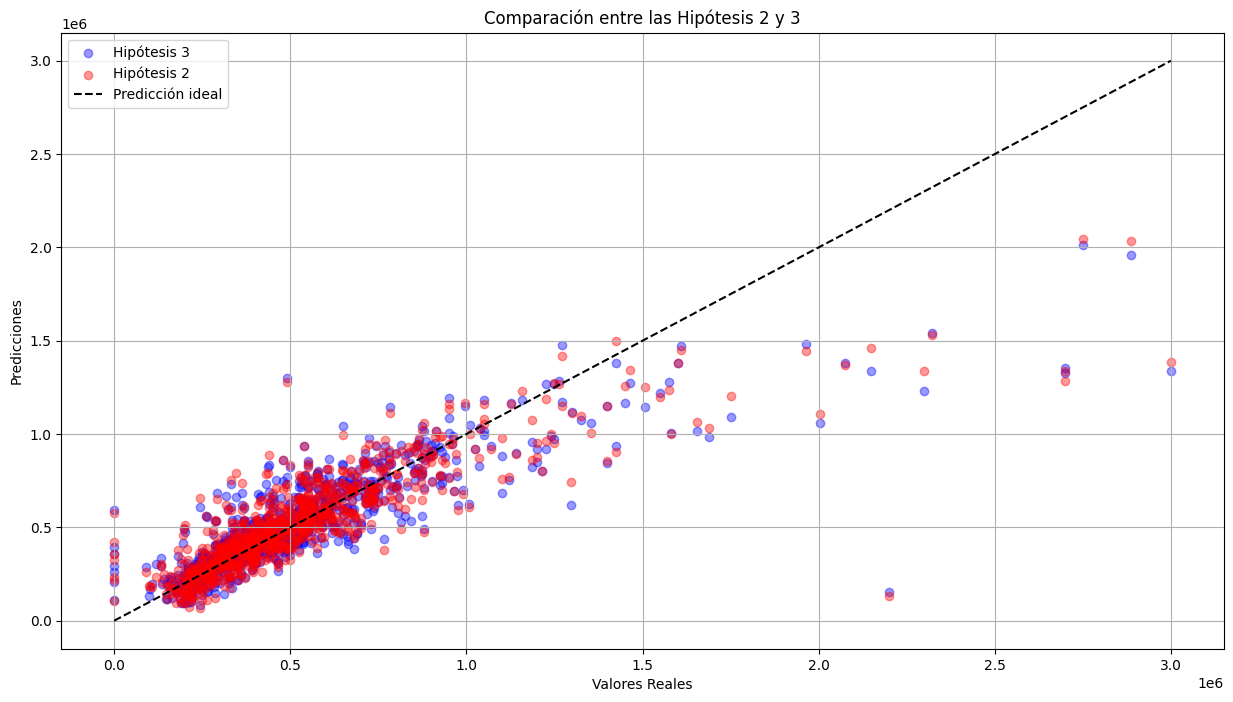

In [42]:
# Comparamos gráficamente las predicciones de las hipótesis 2 y 3
x = np.linspace(np.min(y_test_hip2), np.max(y_test_hip2), 100)

plt.figure(figsize=(15,8))
plt.scatter(y_test_hip3, y_pred_hip3, label='Hipótesis 3', alpha=0.4, color='b')
plt.scatter(y_test_hip1, y_pred_hip2_te, label='Hipótesis 2', alpha=0.4, color='r')
plt.plot(x, x, linestyle='--', color='black', label='Predicción ideal')
plt.title('Comparación entre las Hipótesis 2 y 3')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid()
plt.legend()
plt.show()

Las conclusiones son las mismas que para la comparativa entre variantes de de la hipótesis 2.

Vamos a eliminar las viviendas con precio 0 en la hipótesis 3 para ver la diferencia de métricas

In [43]:
# Quitamos las viviendas con precio 0
df_hip3_sin0 = df_hip3[df_hip3['price'] > 0]

# Obtenemos las variables independientes y dependientes
X_hip3_sin0 = df_hip3_sin0.drop('price', axis=1)
y_hip3_sin0 = df_hip3_sin0['price']

# Separamos las variables en entrenamiento y test
X_train_hip3_sin0, X_test_hip3_sin0, y_train_hip3_sin0, y_test_hip3_sin0 = train_test_split(X_hip3_sin0, y_hip3_sin0, test_size=0.2, random_state=42)

In [44]:
# Entrenamos el modelo
model_hip3_sin0 = LinearRegression()
model_hip3_sin0.fit(X_train_hip3_sin0, y_train_hip3_sin0)

# Predecimos con el modelo
y_pred_hip3_sin0 = model_hip3_sin0.predict(X_test_hip3_sin0)

# Sacamos las métricas
mse_hip3_sin0 = mean_squared_error(y_test_hip3_sin0, y_pred_hip3_sin0)
rmse_hip3_sin0 =np.sqrt(mse_hip3_sin0)
r2_hip3_sin0 = r2_score(y_test_hip3_sin0, y_pred_hip3_sin0)

print('Las métricas de eliminar viviendas de precio 0 son:\nRMSE = ', rmse_hip3_sin0, 'R2', r2_hip3_sin0)
print('Las métricas de la hipótesis 3 anterior son:\nRMSE = ', rmse_hip3, 'R2', r2_hip3)
print('Diferencia relativa entre ambos casos: ', np.round(np.abs(mse_hip3_sin0 - mse_hip3)/mse_hip3, 3), '%')


Las métricas de eliminar viviendas de precio 0 son:
RMSE =  171103.22868319254 R2 0.7389789869998153
Las métricas de la hipótesis 3 anterior son:
RMSE =  190529.4967458697 R2 0.6969534508577842
Diferencia relativa entre ambos casos:  0.194 %


Se aprecia una mejora de las predicciones al eliminar ese tipo de viviendas que no tienen precio del 0.194 %

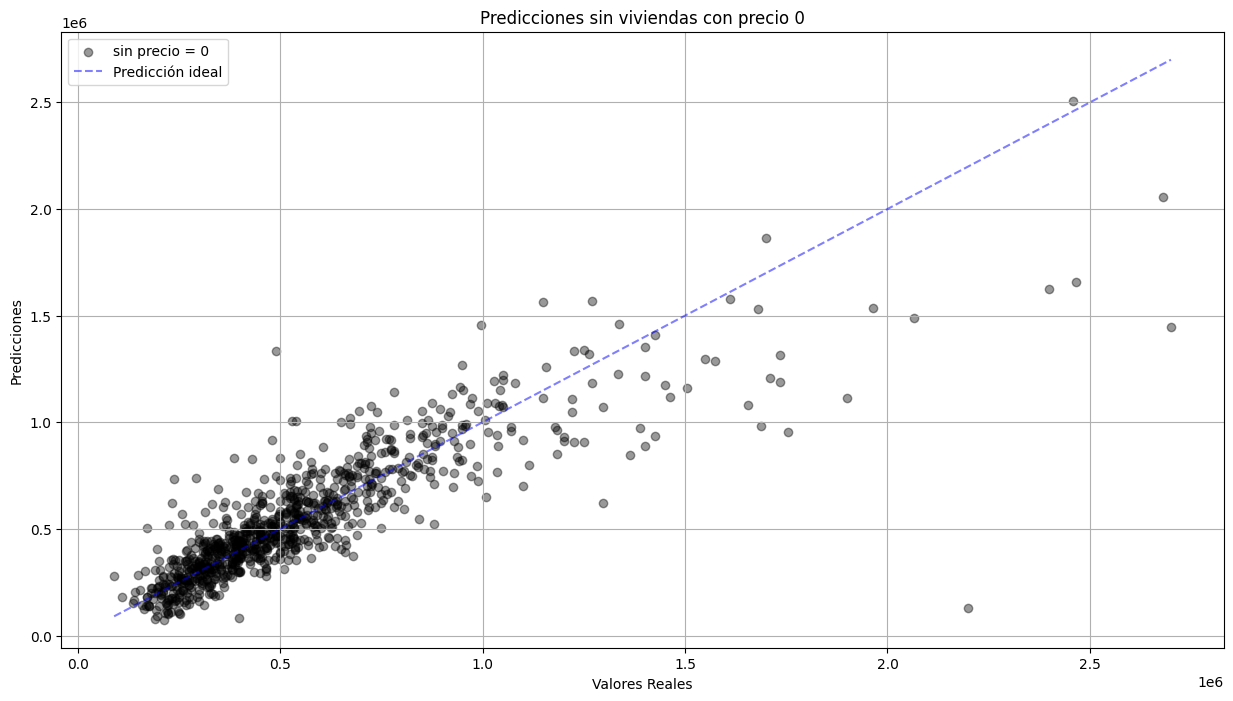

In [45]:
# Comparamos gráficamente las predicciones de las hipótesis 3 y la eliminación de precio = 0 
x = np.linspace(np.min(y_test_hip3_sin0), np.max(y_test_hip3_sin0), 100)

plt.figure(figsize=(15,8))
plt.scatter(y_test_hip3_sin0, y_pred_hip3_sin0, label='sin precio = 0', alpha=0.4, color='black')
plt.plot(x, x, linestyle='--', color='blue', label='Predicción ideal', alpha=0.5)
plt.title('Predicciones sin viviendas con precio 0')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid()
plt.legend()
plt.show()